# Lab 10-3 MNIST with CNN (Keras, BN)
* Batch Normalization


In [1]:
# 기본 Library 선언 및 Tensorflow 버전 확인
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

print(tf.__version__)

2.0.0


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
# Visualize training results
# 네트워크 학습후 결과를 시각화
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss=history.history['loss']
    val_loss=history.history['val_loss']

    epochs_range = range(training_epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

### Tensorflow 2.0 버전에 맞게 Keras를 활용한 MNIST를 분류 모델 생성

### Hyper Parameters

In [9]:
learning_rate = 0.01
training_epochs = 5
batch_size = 100

tf.random.set_seed(777)

### Datasets

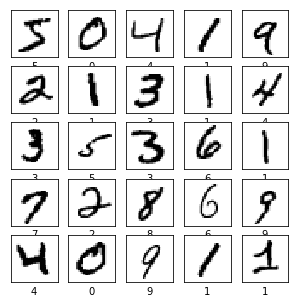

In [10]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()    

train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

class_names = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9']

plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    

train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)


###  Tensorflow Keras
#### 위 Data를 기준으로 CNN분류 모델 생성
* Tensorflow keras API를 통해 모델에 대한 정의

* (1)SGD Optimizer, activation='sigmoid'

In [18]:
model1 = Sequential([
    Conv2D(32, 3, activation='sigmoid', padding='same',  input_shape=(28, 28, 1)),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(),

    Flatten(),
    Dense(512, activation=tf.nn.relu),
    Dropout(0.2),
    Dense(10, activation=tf.nn.softmax)
])

In [19]:
model1.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
history1 = model1.fit(train_images, train_labels, validation_data=(test_images, test_labels), 
                       batch_size=batch_size, epochs=training_epochs)


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 36s 596us/sample - loss: 2.2854 - accuracy: 0.1578 - val_loss: 2.2338 - val_accuracy: 0.3998
Epoch 2/5
60000/60000 [==============================] - 35s 589us/sample - loss: 1.6605 - accuracy: 0.5662 - val_loss: 0.7169 - val_accuracy: 0.8102
Epoch 3/5
60000/60000 [==============================] - 36s 595us/sample - loss: 0.5341 - accuracy: 0.8446 - val_loss: 0.3846 - val_accuracy: 0.8910
Epoch 4/5
60000/60000 [==============================] - 34s 568us/sample - loss: 0.3747 - accuracy: 0.8878 - val_loss: 0.3043 - val_accuracy: 0.9118
Epoch 5/5
60000/60000 [==============================] - 34s 566us/sample - loss: 0.3143 - accuracy: 0.9054 - val_loss: 0.2707 - val_accuracy: 0.9208


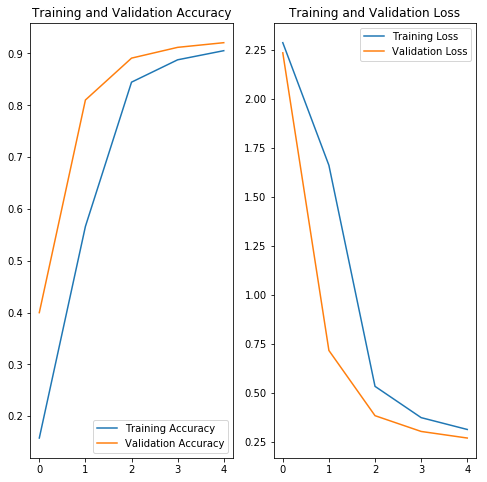

In [22]:
plot_history(history1)

* (2)SGD Optimizer, activation='sigmoid', Batch Normalization

In [11]:
model2 = Sequential([
    Conv2D(32, 3, padding='same',  input_shape=(28, 28, 1)),
    BatchNormalization(),
    Activation('sigmoid'),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=3,  padding='same'),
    BatchNormalization(),
    Activation('sigmoid'),
    MaxPooling2D(),

    Flatten(),
    Dense(512, activation=tf.nn.relu),
    Dropout(0.2),
    Dense(10, activation=tf.nn.softmax)
])

In [12]:
model2.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
history2 = model2.fit(train_images, train_labels, validation_data=(test_images, test_labels), 
                       batch_size=batch_size, epochs=training_epochs)


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 68s 1ms/sample - loss: 0.9532 - accuracy: 0.7325 - val_loss: 0.4671 - val_accuracy: 0.8861
Epoch 2/5
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.4014 - accuracy: 0.8894 - val_loss: 0.2999 - val_accuracy: 0.9241
Epoch 3/5
60000/60000 [==============================] - 70s 1ms/sample - loss: 0.3010 - accuracy: 0.9147 - val_loss: 0.2392 - val_accuracy: 0.9378
Epoch 4/5
60000/60000 [==============================] - 70s 1ms/sample - loss: 0.2414 - accuracy: 0.9317 - val_loss: 0.1902 - val_accuracy: 0.9499
Epoch 5/5
60000/60000 [==============================] - 67s 1ms/sample - loss: 0.2005 - accuracy: 0.9430 - val_loss: 0.1675 - val_accuracy: 0.9534


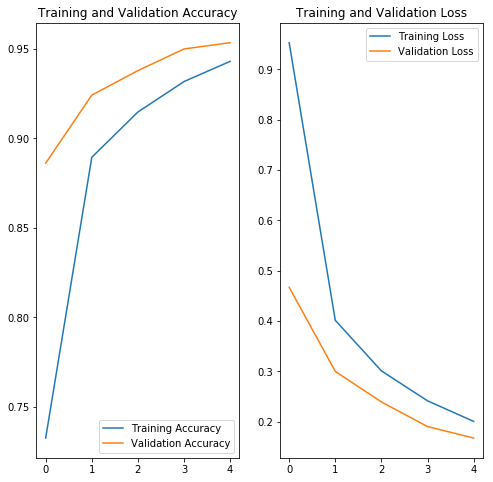

In [16]:
plot_history(history2)

## Visualize training results

#### 네트워크 학습후 결과를 시각화

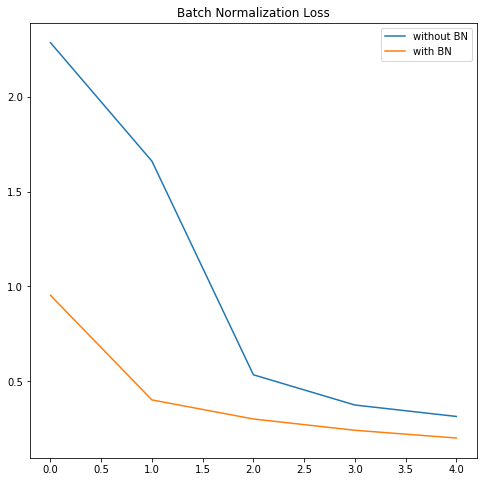

In [28]:

loss1=history1.history['loss']
loss2=history2.history['loss']

epochs_range = range(training_epochs)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, loss1, label='without BN')
plt.plot(epochs_range, loss2, label='with BN')
plt.legend(loc='upper right')
plt.title('Batch Normalization Loss')
plt.show()